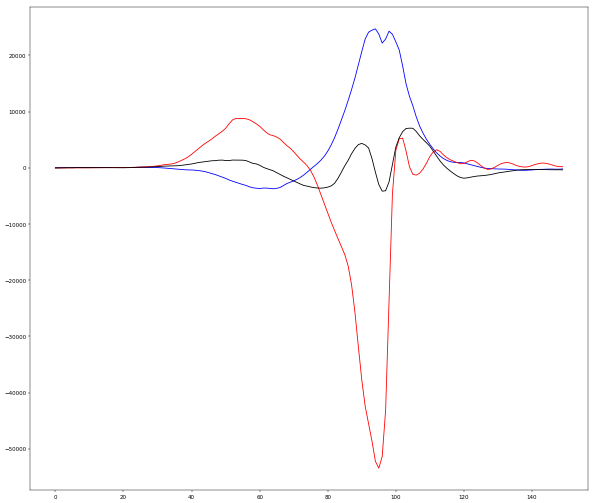

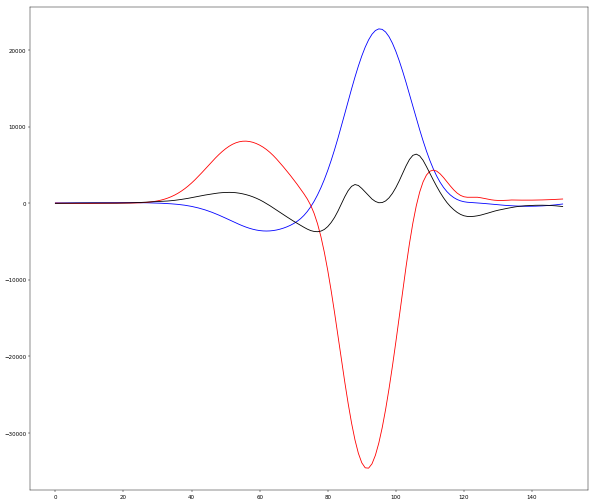

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

col_names = ['timestamp', 'X', 'Y', 'Z']
gyro_data_reference = pd.read_csv('./reference-fd-bw/gyro.csv', names=col_names)

TMP_START = 0
TMP_END = 150

xaxis = list(range(len(gyro_data_reference)))[TMP_START:TMP_END]
x_reference = gyro_data_reference['X'][TMP_START:TMP_END]
# x_alt = savitzky_golay(list(x_reference), 31, 2)
y_reference = gyro_data_reference['Y'][TMP_START:TMP_END]
z_reference = gyro_data_reference['Z'][TMP_START:TMP_END]
fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="zaxis")
plt.show()


# reference data filtration
x_reference = savgol_filter(list(x_reference), 21, 2)
x_reference = savgol_filter(list(x_reference), 31, 2)
y_reference = savgol_filter(list(y_reference), 21, 2)
y_reference = savgol_filter(list(y_reference), 31, 2)
# z_reference = savitzky_golay(list(z_reference), 11, 2)
z_reference = savgol_filter(list(z_reference), 21, 2)

fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference), color="black", label="zaxis")
plt.show()
plt.legend()



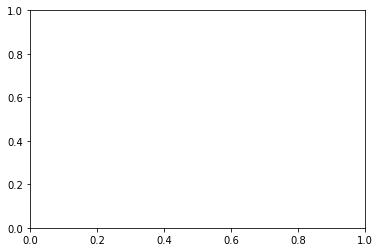

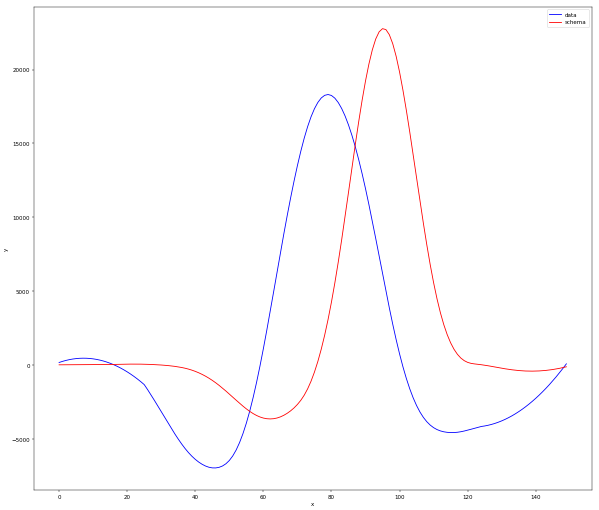

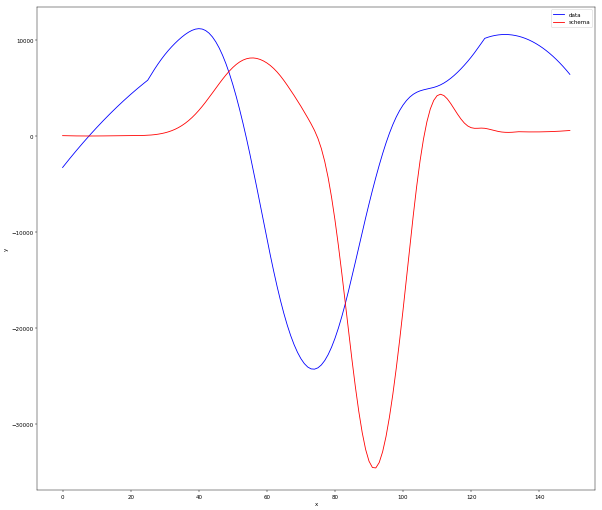

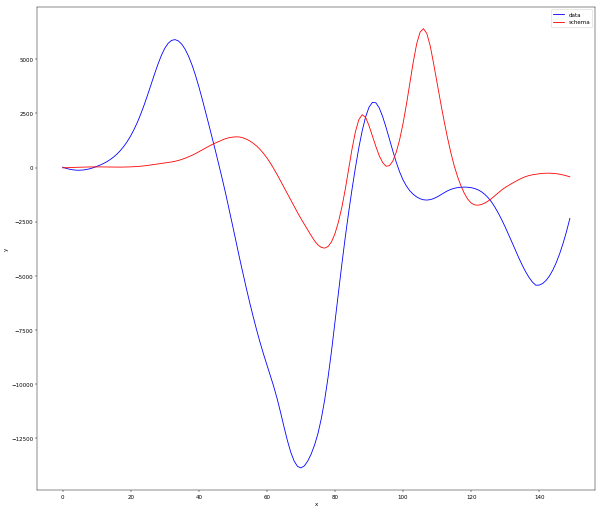

In [3]:

TMP_START = 0
TMP_END = 150

gyro_data_forward = pd.read_csv('./amg-forward/gyro.csv', names=col_names)
xaxis = list(range(len(gyro_data_forward)))[TMP_START:TMP_END]

x_normal = gyro_data_forward['X'][TMP_START:TMP_END]
y_normal = gyro_data_forward['Y'][TMP_START:TMP_END]
z_normal = gyro_data_forward['Z'][TMP_START:TMP_END]

# forward data normalization
x_normal = savgol_filter(list(x_normal), 21, 2)
x_normal = savgol_filter(list(x_normal), 51, 2)
y_normal = savgol_filter(list(y_normal), 31, 2)
y_normal = savgol_filter(list(y_normal), 51, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)
z_normal = savgol_filter(list(z_normal), 21, 2)


fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(x_reference), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(y_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(y_reference), color="red", label="schema")
# plt.plot(xaxis, np.rad2deg(z_normal), color="black", label="zaxis")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(z_normal), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(z_reference), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [4]:
%pylab inline
from dtw import dtw
# DTW for Z acc
x_normal = gyro_data_forward['X']
# y_normal = gyro_data_forward['Y'][TMP_START:TMP_END]
# z_normal = gyro_data_forward['Z'][TMP_START:TMP_END]
x_normal = savgol_filter(list(x_normal), 21, 2)
x_normal = savgol_filter(list(x_normal), 51, 2)

k = x_normal[150:300]
n = x_reference

dtw_x_data = []
dtw_dict_data = {}
# this simple for loop calculates the similarities between reference model
# and given time-window (ie. from 100 to 250)
dtw_step = 20
for it in range(0, 3000, dtw_step):
    k = x_normal[it:it+150]
    dist, cost, *_ = dtw(k, n, dist=lambda k, n: norm(k - n))
    dtw_x_data.append(mean(cost))
    # dtw_dict_data[mean(cost)] = it

Populating the interactive namespace from numpy and matplotlib


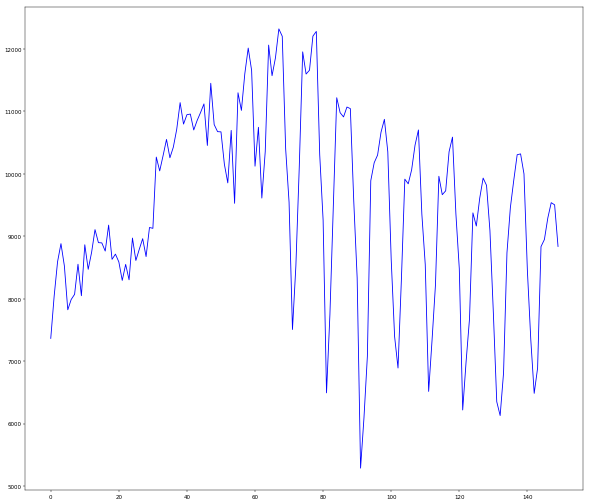

In [5]:
# Plot showing where local minimums are (these are the indexes we are
# searching for). Roughly every 150 indexes there should occur next minimum.
xaxis = list(range(len(dtw_x_data)))
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(dtw_x_data), color="blue", label="data")


150
[0, 5, 11, 18, 21, 25, 30, 35, 42, 46, 54, 56, 62, 69, 71, 79, 81, 89, 91, 95, 102, 109, 111, 119, 121, 129, 132, 135, 142, 149]


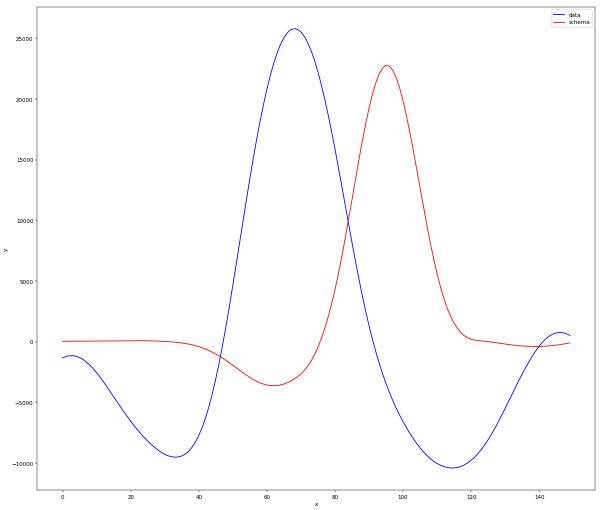

In [6]:
minima_indexes = []
# minima_dict_indices = []
print(len(dtw_x_data))
step = 5
for it in range(0, len(dtw_x_data), step):
    val = min(dtw_x_data[it:it+step])
    # minima_dict_indices.append(dtw_dict_data[val])
    minima_indexes.append(dtw_x_data.index(val))


# forward data normalization
index = minima_indexes[7]*20

print(minima_indexes)
# print(minima_dict_indices)
fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_normal[index:index+150]), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(x_reference), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [22]:
# regresja logistyczna
# rotation matrix -> dtw?
# std max mean median min
reference_data = dict(
    std=[np.std(x_reference), np.std(y_reference), np.std(z_reference)],
    mean=[mean(x_reference), mean(y_reference), mean(z_reference)],
    median=[median(x_reference), median(y_reference), median(z_reference)],
    max=[max(x_reference), max(y_reference), max(z_reference)],
    min=[min(x_reference), min(y_reference), min(z_reference)],
)
import pprint
pprint.pprint(reference_data)

{'max': [397.35208611944819, 141.46367224071381, 111.88081769110669],
 'mean': [46.606316773410825, -39.200967774887019, 3.2857969943219363],
 'median': [0.53107880678650821, 7.158783600666891, 0.47879617757550896],
 'min': [-63.415891331381758, -603.8872428468211, -64.961909304103756],
 'std': [121.88467358824752, 180.61022648940374, 32.261018122959371]}
